# Exercise: RDataFrame and collections

The same dataset used in the previous exercise (`TTree` "dataset" in file `../data/example_file.root`) contains two vector columns `vec1` and `vec2`.<br>
The elements of `vec1` are distributed as a mixture of Gaussians, plus background noise.<br>
To remove the background noise, select the elements of `vec1` for which the square of the corresponding elements in `vec2` is less than 0.1.

Where are the peaks of this mixture of Gaussians?

### Useful links

- [RDataFrame: working with collections](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#collections)
- [RVec reference](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html)

In [2]:
import ROOT as rt

In [16]:
treename = "dataset"
filename = "example_file.root"
df = rt.RDataFrame(treename, filename)
print(f"Columns in the dataset: {df.GetColumnNames()}")

Columns in the dataset: { "a", "b", "vec1", "vec2" }


In [17]:
df1 = df.Define("vec3", "vec1[(vec2*vec2) < 0.1]")
df1.Display().Print()

+-----+------------+------------+------------+--------------+-----------+
| Row | a          | b          | vec1       | vec2         | vec3      | 
+-----+------------+------------+------------+--------------+-----------+
| 0   | 0.97771140 | 0.99974175 | -3.22012f  | 0.894402f    |           | 
+-----+------------+------------+------------+--------------+-----------+
| 1   | 2.2802012  | 0.48497361 | -1.80835f  | 0.0800873f   | -1.80835f | 
|     |            |            | 0.236065f  | 0.479906f    |           | 
|     |            |            | -3.97713f  | 0.519888f    |           | 
|     |            |            | -0.293643f | 0.317273f    |           | 
+-----+------------+------------+------------+--------------+-----------+
| 2   | 0.56348245 | 0.39231399 |            |              |           | 
+-----+------------+------------+------------+--------------+-----------+
| 3   | 3.0421559  | 0.33353925 | 0.727539f  | 0.796610f    | -2.87416f | 
|     |            |          

input_line_106:2:54: error: use of undeclared identifier 'gauss'
Double_t TFormula____id204443205027795977(){ return {gauss} ; }
                                                     ^
input_line_107:2:54: error: use of undeclared identifier 'gauss'
Double_t TFormula____id204443205027795977(){ return {gauss} ; }
                                                     ^
Error in <prepareMethod>: Can't compile function TFormula____id204443205027795977 prototype with arguments 
Error in <TFormula::InputFormulaIntoCling>: Error compiling formula expression in Cling
Error in <TFormula::ProcessFormula>: "gauss" has not been matched in the formula expression
Error in <TFormula::ProcessFormula>: Formula "gauss" is invalid !
input_line_108:2:54: error: use of undeclared identifier 'gauss'
Double_t TFormula____id204443205027795977(){ return {gauss} ; }
                                                     ^
input_line_109:2:54: error: use of undeclared identifier 'gauss'
Double_t TFormula____id204443

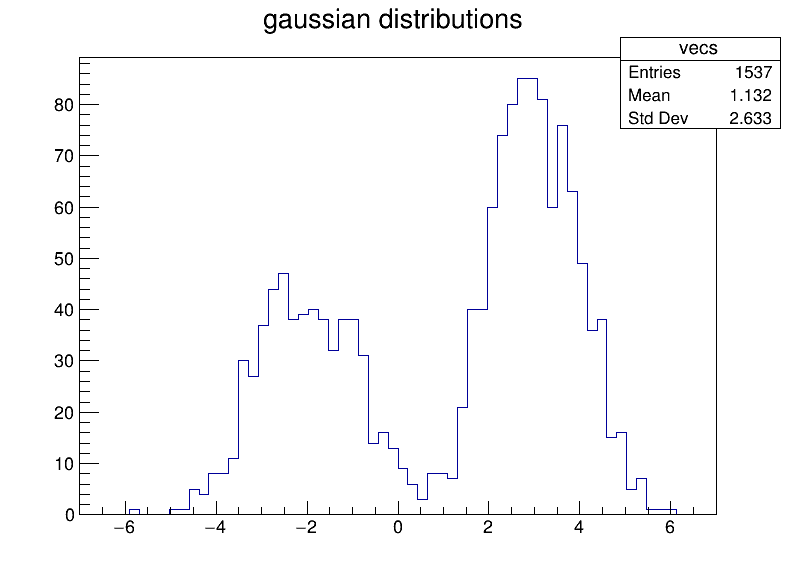

In [18]:
c = rt.TCanvas("c", "canvas", 800, 600)
h = df1.Histo1D(("vecs", "gaussian distributions", 64, -7, 7),"vec3")

gauss1 = rt.TF1("Gauss1","gauss",-5, 0.5)
gauss2 = rt.TF1("Gauss2","gauss",0.5, 6)

h.Fit(gauss1, "R")
h.Fit(gauss2, "R2")

h.Draw()
c.Draw()